# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import (
    OrdinalEncoder, 
    OneHotEncoder, 
    StandardScaler, 
    MinMaxScaler
)
from sklearn.svm import SVR
from sklearn.metrics import (
    r2_score, 
    mean_squared_error, 
    mean_absolute_error, 
    mean_absolute_percentage_error
)

import warnings
warnings.filterwarnings('ignore')

np.random.seed(12345)

# 2. Read Data

In [2]:
data = pd.read_csv('salary_dataset.csv')

data

age  experience   gpa     degree    position   salary
0   30.0         7.0  3.94   bachelor    engineer  32500.0
1   26.0         2.0  2.86   bachelor         NaN  22500.0
2   27.0         0.0  3.13  doctorate   secretary  37000.0
3   32.0         NaN  3.10   bachelor    engineer  24500.0
4   24.0         1.0  3.81   bachelor  accountant  23500.0
..   ...         ...   ...        ...         ...      ...
85  31.0         1.0  2.79     master    engineer  34000.0
86   NaN         5.0  3.27  doctorate   secretary  36000.0
87  28.0         7.0  2.64  doctorate   secretary  38000.0
88  26.0         1.0  2.52   bachelor   secretary      NaN
89  27.0         2.0  3.79     master    engineer  35000.0

[90 rows x 6 columns]

# 3. Clean Data

## 3.1. Handle Missing Values

### 3.1.1. Check Missing Values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         89 non-null     float64
 1   experience  89 non-null     float64
 2   gpa         90 non-null     float64
 3   degree      90 non-null     object 
 4   position    89 non-null     object 
 5   salary      89 non-null     float64
dtypes: float64(4), object(2)
memory usage: 4.3+ KB


### 3.1.2. Remove Missing Values (Listwise Deletion)

In [4]:
data.dropna(axis=0, inplace=True)

## 3.2. Handle Outliers

### 3.2.1. Check Outliers

In [5]:
data.describe()

age  experience        gpa        salary
count  86.000000   86.000000  86.000000     86.000000
mean   28.023256    3.848837   3.278605  31348.837209
std     4.408486    3.702201   0.528937   9255.227384
min    21.000000    0.000000   2.540000  13000.000000
25%    24.000000    1.000000   2.820000  24500.000000
50%    28.000000    3.000000   3.260000  30500.000000
75%    32.000000    7.000000   3.640000  37375.000000
max    35.000000   13.000000   5.880000  54000.000000

### 3.2.2. Remove Outliers

In [6]:
# no outlier to remove

# 4. Split Dataset into Training & Test Sets

In [7]:
target_name = 'salary'
feature_name = list(data.columns.drop(target_name))

In [8]:
X = data[feature_name]
y = data[target_name]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# 5. Data Preparation

In [10]:
numerical_feature = ['age', 'experience', 'gpa']
categorical_feature = ['degree', 'position']

In [11]:
for feature in categorical_feature:
    print(feature, ':', np.unique(X_train[feature]))

degree : ['bachelor' 'doctorate' 'master']
position : ['accountant' 'engineer' 'secretary']


In [12]:
ordinal_feature = ['degree']
nominal_feature = ['position']

## 5.1. Ordinal Encoding

### 5.1.1. Training Set

In [13]:
categories = [
    np.array(['bachelor', 'master', 'doctorate'], dtype=object),
]

In [14]:
ordinal_encoder = OrdinalEncoder(categories=categories)
X_train[ordinal_feature] = ordinal_encoder.fit_transform(X_train[ordinal_feature])

### 5.1.2. Test Set

In [15]:
X_test[ordinal_feature] = ordinal_encoder.transform(X_test[ordinal_feature])

## 5.2. One Hot Encoding

### 5.2.1. Training Set

In [16]:
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
one_hot_encoder.fit(X_train[nominal_feature])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [17]:
one_hot_feature = []
for i, feature in enumerate(nominal_feature):
    for cate in one_hot_encoder.categories_[i]:
        one_hot_feature_name = str(feature) + '_' + str(cate)
        one_hot_feature.append(one_hot_feature_name)

In [18]:
X_train[one_hot_feature] = one_hot_encoder.transform(X_train[nominal_feature])
X_train.drop(nominal_feature, axis=1, inplace=True)

### 5.2.2. Test Set

In [19]:
X_test[one_hot_feature] = one_hot_encoder.transform(X_test[nominal_feature])
X_test.drop(nominal_feature, axis=1, inplace=True)

## 5.3. Feature Scaling

### 5.3.1. Training Set

In [20]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 5.3.2. Test Set

In [21]:
X_test_scaled = scaler.transform(X_test)

# 6. Model Creation

## 6.1. Setting Parameters

In [22]:
reg = SVR()

## 6.2. Train Model

In [23]:
reg.fit(X_train_scaled, y_train)

SVR()

## 6.3. Model's Weight & Bias

In [24]:
reg.dual_coef_

array([[ 1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1.,
        -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,
         1.,  1., -1., -1.,  1., -1.,  1., -1., -1., -1., -1.,  1.,  1.,
        -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
         1., -1.,  1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,
         1.,  1.,  1.]])

In [25]:
reg.intercept_

array([30752.89566214])

# 7. Prediction

## 7.1. Training Set

In [26]:
y_pred_train = reg.predict(X_train_scaled)

In [27]:
y_pred_train

array([30754.42013909, 30750.52174396, 30760.50556513, 30748.21039087,
       30750.38682028, 30753.22298002, 30750.60132717, 30745.54545563,
       30753.46580284, 30755.83113964, 30747.36546067, 30744.92886117,
       30744.20673545, 30749.93260655, 30755.85037247, 30758.30844351,
       30745.93418925, 30752.3163509 , 30757.23233579, 30754.67855123,
       30757.40185763, 30744.18803763, 30744.5594969 , 30748.11187128,
       30757.4029612 , 30751.68234661, 30753.36058944, 30757.19640397,
       30748.11973166, 30749.31481597, 30757.45653986, 30748.40418388,
       30760.03130541, 30751.78960925, 30745.67384577, 30750.09602145,
       30744.53434634, 30754.04209577, 30753.98889558, 30750.5585099 ,
       30760.17209189, 30751.75933925, 30754.00181423, 30756.88209447,
       30756.64586633, 30756.04690016, 30757.30887203, 30756.27806216,
       30755.46350089, 30757.30733243, 30752.83160738, 30747.59327242,
       30754.97891146, 30749.58422731, 30757.87474134, 30754.17963477,
      

## 7.2. Test Set

In [28]:
y_pred_test = reg.predict(X_test_scaled)

In [29]:
y_pred_test

array([30754.57320323, 30747.33869321, 30748.0029556 , 30749.26107938,
       30749.97017895, 30747.60232102, 30748.66413249, 30757.86234433,
       30750.69143778, 30746.19310293, 30745.09851056, 30757.50707703,
       30752.76323561, 30755.00276293, 30759.04732954, 30746.0228652 ,
       30744.0994363 , 30755.85359871])

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Scoring

In [30]:
print('r2_score =\t\t\t', r2_score(y_train, y_pred_train))
print('mean_squared_error =\t\t', mean_squared_error(y_train, y_pred_train))
print('mean_absolute_error =\t\t', mean_absolute_error(y_train, y_pred_train))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_train, y_pred_train))

r2_score =			 -0.01598634373365182
mean_squared_error =		 91737370.72866143
mean_absolute_error =		 7702.223713652323
mean_absolute_percentage_error = 0.25888279491149024


### 8.1.2. Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

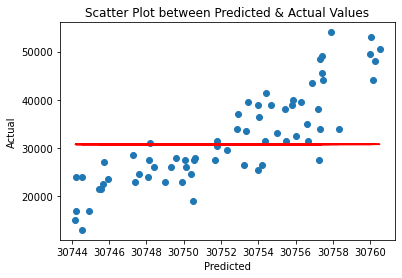

In [31]:
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## 8.2. Test Set

### 8.2.1. Scoring

In [32]:
print('r2_score =\t\t\t', r2_score(y_test, y_pred_test))
print('mean_squared_error =\t\t', mean_squared_error(y_test, y_pred_test))
print('mean_absolute_error =\t\t', mean_absolute_error(y_test, y_pred_test))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_test, y_pred_test))

r2_score =			 -0.05719606805035493
mean_squared_error =		 59287816.532330096
mean_absolute_error =		 5831.1860499751965
mean_absolute_percentage_error = 0.22731298735849637


### 8.2.2 Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

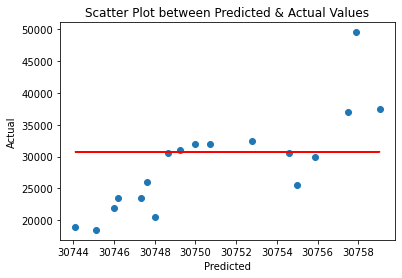

In [33]:
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 9. Save Model

In [34]:
import pickle

In [35]:
pickle.dump((reg, 
             ordinal_encoder, 
             one_hot_encoder, 
             feature_name, 
             numerical_feature, 
             ordinal_feature, 
             nominal_feature),  open('support_vector_regrssion_model.pickle', 'wb'))